# Time-series Simulation of Distribution System with PV Control on Python-OpenDSS Interface

## 1. Basic Modules

In [1]:
import opendssdirect as dss
import os
import pathlib
import numpy as np
import pandas as pd
import random
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
from matplotlib.animation import FuncAnimation
from celluloid import Camera

In [2]:
dss.__version__
dss.run_command('Redirect C:/Users/smartgrid_AI/Documents/kms/Hyundai/Final_IEEE37/NewIeee37.dss')
dss.run_command("New Energymeter.M1  Line.L1  1")
#dss.Solution.Solve()

''

In [3]:
allbusname = dss.Circuit.AllBusNames()
busmagpu = dss.Circuit.AllBusMagPu()
allbus = np.array(allbusname)
busmagpu3 = np.array(busmagpu).reshape(-1,3)
BusXY = 'C:/Users/smartgrid_AI/Documents/kms/Hyundai/IEEE37_BusXY.csv'
busposition = pd.read_csv(BusXY, encoding='CP949', header=None)
BusVol = np.concatenate([allbus.reshape(-1,1), busmagpu3], axis=1)
Volavg = np.average(busmagpu3[2:-1], axis=1)

## 2. PV Installation

In [4]:
dss.run_command("New Loadshape.MyIrrad npts=24 interval=1 mult=[0	0	0	0	0	0	0.060635269	0.334303652	0.712509398	1.188145406	1.519300343	1.633283854	1.720008482	1.7748861	1.635712863	1.448499219	1.085587235	0.635140953	0.224818306	0.027168919	0	0	0	0]")
dss.run_command("New Loadshape.NormIrrad npts=24 interval=1 mult=[0	0	0	0	0.034162907	0.188352172	0.401439505	0.66942065	0.855998784	0.920218967	0.969081048	1	0.921587511	0.816108267	0.61163769	0.357848852	0.126666329	0.015307416	0	0	0	0]")
dss.run_command("New Loadshape.MyLoad npts=24 interval=1 mult=[0.88649465	0.847586893	0.824626468	0.810807748	0.808050417	0.81543569	0.854856043	0.918443729	1.011297018	1.074020336	1.104456893	1.115341911	1.083370481	1.122746619	1.136014359	1.130316038	1.129009039	1.112199769	1.092962104	1.084670677	1.072273622	1.032156527	0.982890926	0.949972043]")
dss.run_command("New Loadshape.LightLoad npts=24 interval=1 mult=[0.780355145	0.746105792	0.725894406	0.713730193	0.711302996	0.717804034	0.752504611	0.808478979	0.890214996	0.945428486	0.972220892	0.981802653	0.953659144	0.988320799	1	0.994983936	0.993833423	0.979036717	0.962102367	0.954803668	0.943890906	0.908577008	0.865209949	0.836232426]")

''

## 2-1. Manual Installation

In [5]:
pv_location=["702", "710", "709", "734", "741"]
PV_num = len(pv_location)

In [6]:
dss.run_command("New PVSystem.PV1 conn=Delta phases=3 bus=702 kV=4.8 irrad=1.0 Pmpp=400 kVA=400 kvarMax=300 kvarMaxAbs=300 Daily=MyIrrad WattPriority=False VarFollowInverter=False")
dss.run_command("New PVSystem.PV2 conn=Delta phases=3 bus=710 kV=4.8 irrad=1.0 Pmpp=400 kVA=400 kvarMax=300 kvarMaxAbs=300 Daily=MyIrrad WattPriority=False VarFollowInverter=False")
dss.run_command("New PVSystem.PV3 conn=Delta phases=3 bus=709 kV=4.8 irrad=1.0 Pmpp=500 kVA=500 kvarMax=400 kvarMaxAbs=400 Daily=MyIrrad WattPriority=False VarFollowInverter=False")
dss.run_command("New PVSystem.PV4 conn=Delta phases=3 bus=734 kV=4.8 irrad=1.0 Pmpp=500 kVA=500 kvarMax=400 kvarMaxAbs=400 Daily=MyIrrad WattPriority=False VarFollowInverter=False")
dss.run_command("New PVSystem.PV5 conn=Delta phases=3 bus=741 kV=4.8 irrad=1.0 Pmpp=700 kVA=700 kvarMax=500 kvarMaxAbs=500 Daily=MyIrrad WattPriority=False VarFollowInverter=False")

''

In [7]:
dss.run_command("New XYCurve.VVCurve npts=6 Xarray=(0.5, 0.95, 0.99, 1.01, 1.05, 1.5) Yarray=(1.0, 1.0, 0, 0, -1.0, -1.0)")
dss.run_command("New XYCurve.VWCurve npts=6 Xarray=(0.5, 0.95, 1, 1.01, 1.05, 1.5) Yarray=(1.0, 1.0, 1.0, 1.0, 0, 0)")
#dss.run_command("New InvControl.PVCtr CombiMode=VV_VW voltage_curvex_ref=rated vvc_curve1=VVCurve voltwatt_curve=VWCurve RefReactivePower=VARMAX")
dss.run_command("New InvControl.PVCtr1 mode=VOLTVAR voltage_curvex_ref=rated vvc_curve1=VVCurve RefReactivePower=VARMAX DeltaQ_factor=0.5")

''

## 2-2. Check PV Installation

In [8]:
dss.utils.pvsystems_to_dataframe()

Irradiance Name pf                                   RegisterNames  \
pv1          1  pv1  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   
pv2          1  pv2  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   
pv3          1  pv3  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   
pv4          1  pv4  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   
pv5          1  pv5  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   

                     RegisterValues Idx kVARated   kW kvar IrradianceNow Pmpp  \
pv1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   1      400  400    0             1  400   
pv2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   2      400  400    0             1  400   
pv3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   3      500  500    0             1  500   
pv4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   4      500  500    0             1  500   
pv5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   5      700  700    0             1  700   

       daily duty yearly Tdaily Tduty Tyearly  
pv1  myirrad                                   
pv2  myirrad                                   
pv3  myirrad                                   
pv4  myirrad                                   
pv5  myirrad

## 3. Settings for Time-Series Simulation

In [9]:
allLoad_name = dss.Loads.AllNames()
for loadname in allLoad_name:
    #dss.run_command("Load."+loadname+".daily=MyLoad")
    dss.run_command("Load."+loadname+".daily=LightLoad")
    
allPV_name = dss.PVsystems.AllNames()
for pvname in allPV_name:
    dss.run_command("PVSystem."+pvname+".daily=MyIrrad")
    
dss.run_command("New monitor.PV5m1 PVSystem.PV5 terminal=1 mode=1 ppolar=no")
dss.run_command("New monitor.PV5m0 PVSystem.PV5 terminal=1 mode=0 ppolar=no")    

''

In [10]:
dss.Settings.VoltageBases = [230,4.8,0.48]
dss.run_command("CalcVoltageBases")
dss.Solution.MaxIterations=10000
dss.Solution.MaxControlIterations=100000
#dss.Solution.Solve()

In [11]:
dss.run_command("set mode=daily stepsize=1h")
#dss.run_command("set mode=dutyy stepsize=1h")
dss.Solution.ControlMode = "time"

## 4. Time-Series Simulation
## 4-1. High PV Output & Light Load Case

In [12]:
V_list, P_list, PV_list = [], [], []
dss.Solution.Hour = 0
for i in range(24):    
    dss.Solution.InitSnap()
    dss.Solution.SolvePlusControl()
    #while dss.Solution.ControlActionsDone()==0:
    #    dss.Solution.SolveNoControl()
    #    dss.Solution.SampleControlDevices()
    #    dss.Solution.DoControlActions()
    dss.run_command("Export monitors PV5m1")
    dss.run_command("Export monitors PV5m0")
    dss.run_command("Export Powers")
    dss.run_command("Export Voltages")
    dss.Solution.FinishTimeStep()
    dss.Solution.Hour = dss.Solution.Hour+1
    
    volts = dss.Circuit.AllBusMagPu()
    powers = pd.read_csv('ieee37_EXP_POWERS.csv')
    PVS = dss.utils.pvsystems_to_dataframe()
    
    V_list.append(volts)
    P_list.append(powers.iloc[-5:,2:4])
    PV_list.append(PVS.iloc[:,7:9])
dss.Monitors.SaveAll()    
V_list = np.array(V_list)

In [13]:
buspos = busposition.iloc[:,0]
buspos = buspos.values
newpos = np.zeros([len(busposition),2])
for i in range(len(BusVol)):
    ind = np.where(buspos == BusVol[i,0])
    newpos[i,:] = busposition.iloc[ind[0][0],1:]  
    
BusDat = np.concatenate([BusVol, newpos], axis=1)

dss.Lines.First()
name, B1, B2 = list(), list(), list()

while True:
    a = dss.Lines.Name()
    b = dss.Lines.Bus1()
    c = dss.Lines.Bus2()
    b = b.replace('.1.2.3','')
    c = c.replace('.1.2.3','')
    name.append(a),
    B1.append(b),
    B2.append(c)
    if not dss.Lines.Next() > 0:
        break
        
busnamepos = np.concatenate([BusVol[:,0].reshape(-1,1), newpos], axis=1)

In [14]:
V3_list = V_list.reshape(24,-1)
V3p_list = V3_list.reshape(24,-1,3)
V3p_list = V3p_list[:,:,:]
posvalue = busnamepos[:,1:].astype(np.float)

ind = np.zeros(len(posvalue))
dist = np.zeros(len(posvalue))
#dist_d = np.zeros(len(posvalue))
newvol = np.zeros(V3p_list.shape)
for i in range(len(posvalue)):
    ind[i] = np.where(BusVol[:,0]==busposition.iloc[i, 0])[0][0]
    ind = ind.astype(np.int)
    newvol[:,i,:] = V3p_list[:,ind[i],:]
    if i<4:
        dist[i] = busposition.iloc[4, 2] - busposition.iloc[i, 2] 
    else:
        dist[i] = abs(busposition.iloc[i, 1]) + abs(busposition.iloc[4, 2]-busposition.iloc[i, 2])
dist[31] = dist[12]+1.3
dist[19] = dist[9] +0.92
dist[33] = dist[32]+0.4
dist[13] = dist[33]+0.4
dist[34] = dist[13]+0.2
dist[35] = dist[13]+0.4

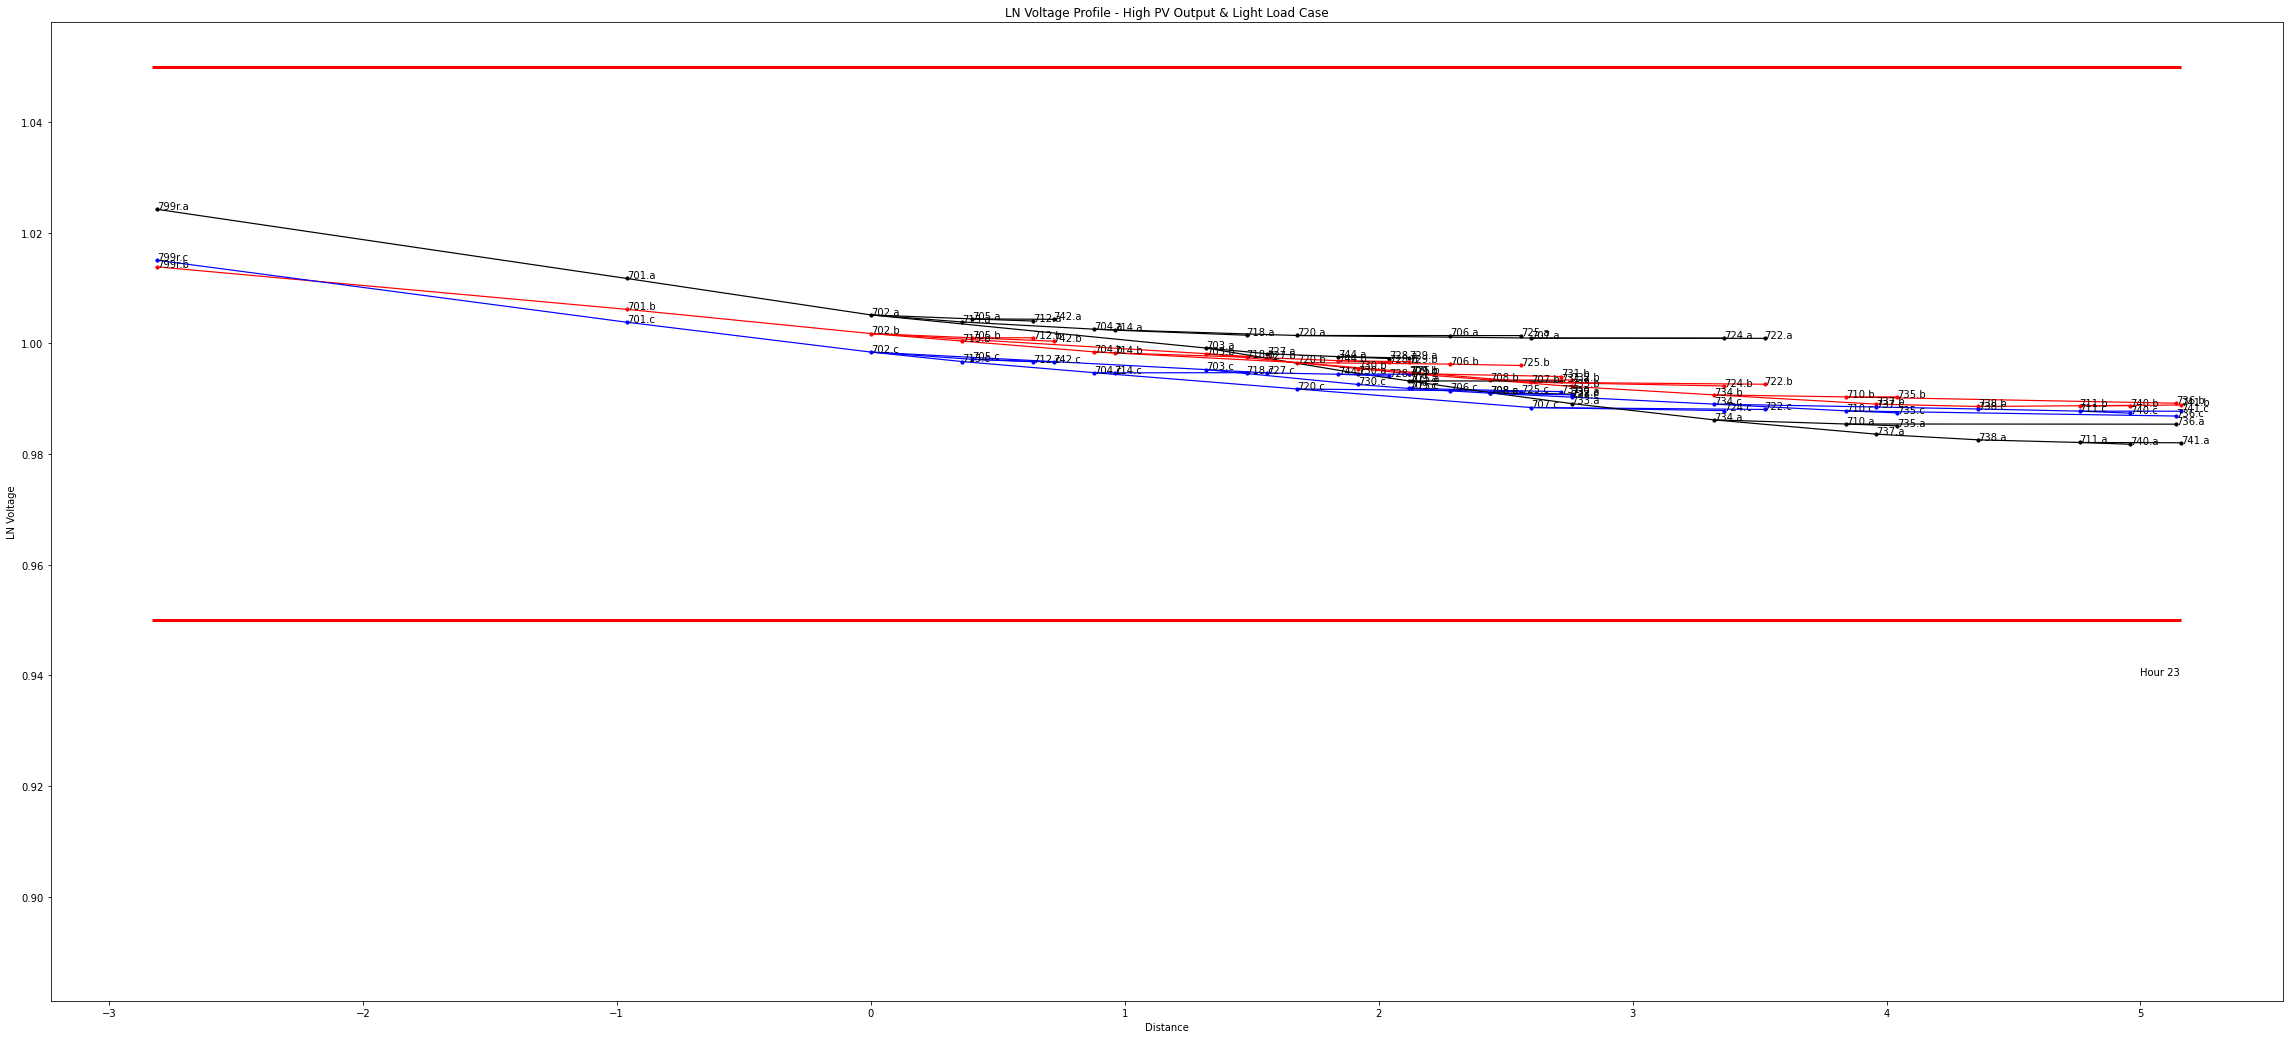

In [31]:
from IPython.display import HTML

fig = plt.figure(figsize=(40, 18))
camera = Camera(fig)
plt.xlabel('Distance')
plt.ylabel('LN Voltage')
for t in range(24):
    plt.title("LN Voltage Profile - High PV Output & Light Load Case")
    x = dist[2:]
    y1 = newvol[t, 2:, 0]
    y2 = newvol[t, 2:, 1]
    y3 = newvol[t, 2:, 2]
    plt.scatter(x, y1, c='black', s=10)
    plt.scatter(x, y2, c='red', s=10)
    plt.scatter(x, y3, c='blue', s=10)
    plt.hlines(0.95, dist[0], max(dist), colors='red', linewidth=3)
    plt.hlines(1.05, dist[0], max(dist), colors='red', linewidth=3)
    plt.text(5, 0.94, "Hour "+str(t))
    for i in range(2, len(newpos)): 
        name = busposition.iloc[i,0]
        x = dist[i] 
        ya = newvol[t,i,0]
        yb = newvol[t,i,1]
        yc = newvol[t,i,2]
        plt.text(x, ya, name+".a")
        plt.text(x, yb, name+".b")
        plt.text(x, yc, name+".c")

    for i in range(len(B1)):
        ind1 = np.where(busposition.iloc[:,0]==B1[i])[0][0]
        ind2 = np.where(busposition.iloc[:,0]==B2[i])[0][0]
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,0], newvol[t,ind2,0]], c='black', linewidth=1.2)
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,1], newvol[t,ind2,1]], c='red', linewidth=1.2)
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,2], newvol[t,ind2,2]], c='blue', linewidth=1.2)
    camera.snap()
anim = camera.animate(interval=1000, blit=True)
HTML(anim.to_html5_video())

In [16]:
anim.save('QpriorVV High PV Output Low Light Case.mp4')

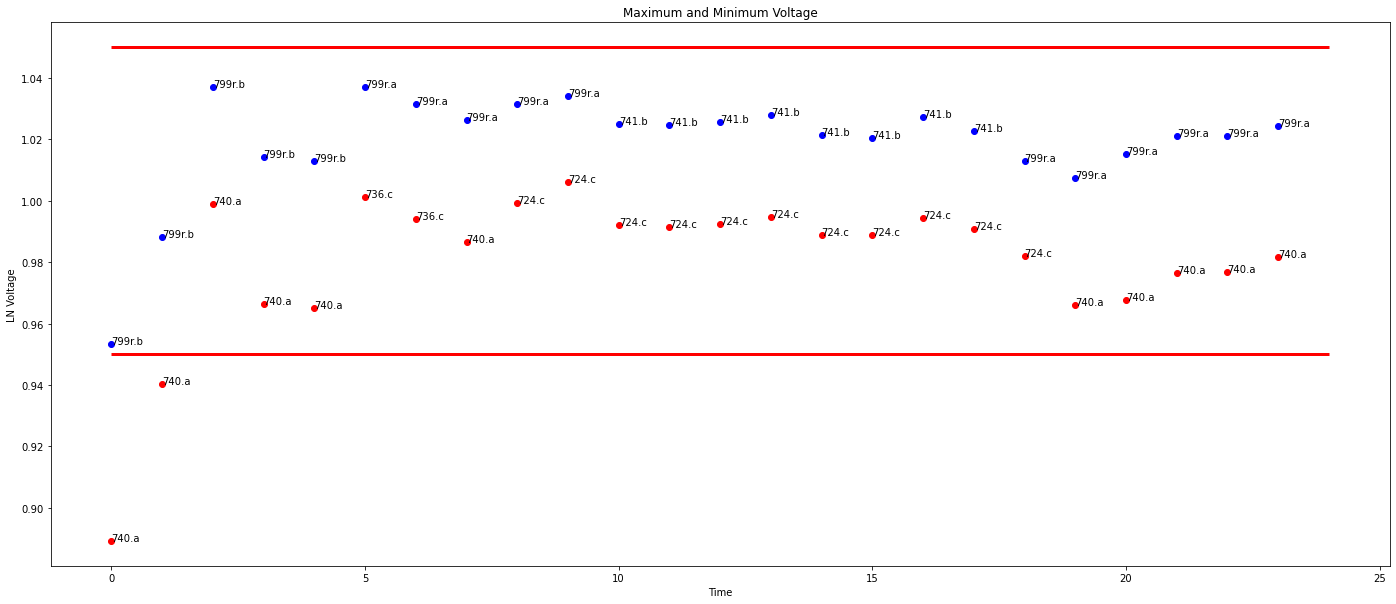

In [15]:
fig = plt.figure(figsize=(24, 10))
plt.xlabel('Time')
plt.ylabel('LN Voltage')
plt.title('Maximum and Minimum Voltage')
for t in range(24):
    plt.scatter(t, np.max(newvol[t,2:,:]), c='blue')    
    plt.scatter(t, np.min(newvol[t,2:,:]), c='red')
    maxind = np.argmax(newvol[t,2:,:])
    minind = np.argmin(newvol[t,2:,:]) 
    #print(maxind, minind)
    if (maxind)%3 == 0:
        phsmax = 'a'
    elif (maxind)%3 == 1:
        phsmax = 'b'
    else:
        phsmax = 'c'
        
    if (minind)%3 == 0:
        phsmin = 'a'
    elif (minind)%3 == 1:
        phsmin = 'b'
    else:
        phsmin = 'c'
        
    plt.text(t, np.max(newvol[t,2:,:]), busposition.iloc[(maxind)//3+2,0] + "."+ phsmax)
    plt.text(t, np.min(newvol[t,2:,:]), busposition.iloc[(minind)//3+2,0] + "."+ phsmin)
    #print(maxind, minind, maxind//38, minind//38)
plt.hlines(0.95, 0, 24, colors='red', linewidth=3)
plt.hlines(1.05, 0, 24, colors='red', linewidth=3)

In [18]:
ind_pv = np.zeros(len(pv_location), dtype=int)
for i in range(len(pv_location)):
    ind_pv[i] = int(np.where(busnamepos[:,0]==pv_location[i])[0][0])

Vavg = np.mean(V_list.reshape(24,-1,3), axis=2)
PV_Volts = Vavg[:,ind_pv]
PV_PQ = np.array(PV_list)
PV_outputs = np.concatenate([PV_Volts.reshape(24,-1,1), PV_PQ[:,:,:2]], axis=2)
PV_outputs.shape

(24, 5, 3)

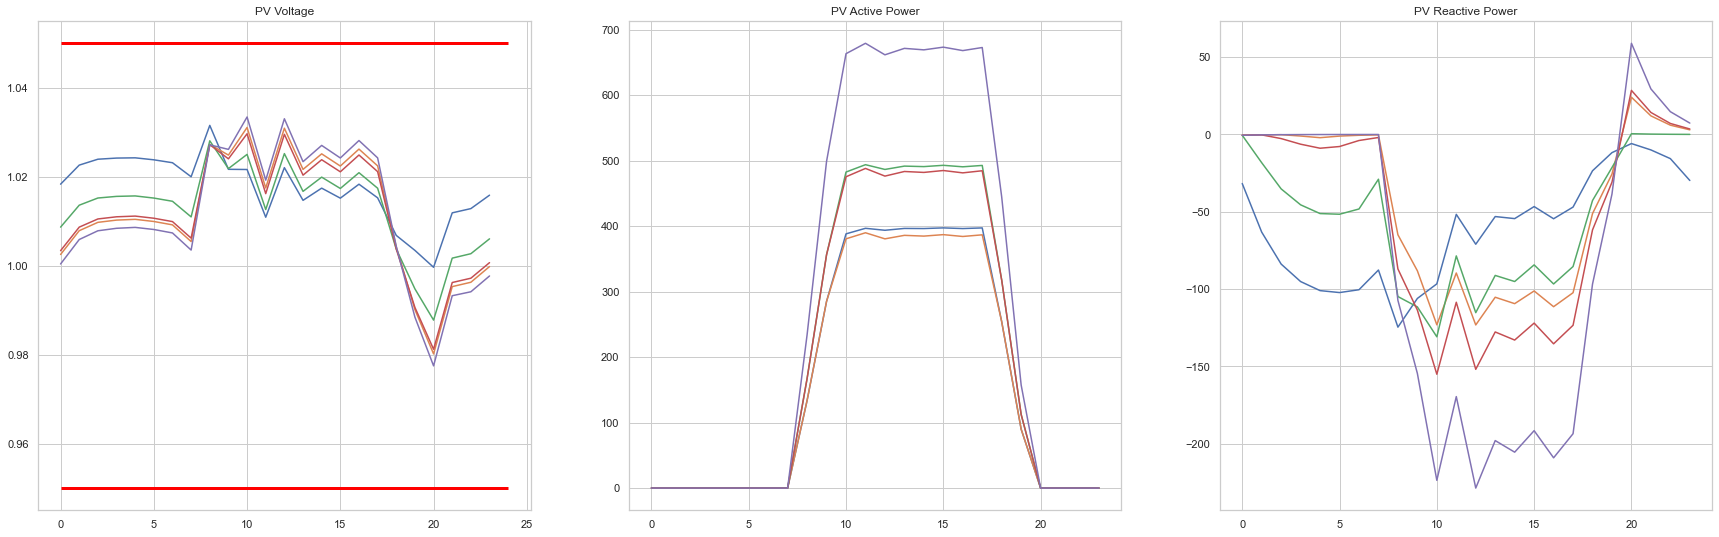

In [19]:
#plt.title("Voltage and Power Output of PVs")
#for t in range(2):
sns.set(style = "whitegrid")
plt.figure(figsize=(30,9))
plt.subplot(131)
for i in range(5):
    plt.plot(PV_outputs[:,i,0])
plt.hlines(0.95, 0, 24, colors='red', linewidth=3)
plt.hlines(1.05, 0, 24, colors='red', linewidth=3)
plt.title("PV Voltage")

plt.subplot(132)
for i in range(5):
    plt.plot(PV_outputs[:,i,1])
plt.title("PV Active Power")

plt.subplot(133)
for i in range(5):
    plt.plot(PV_outputs[:,i,2])
plt.title("PV Reactive Power")
plt.show()


## 4-2. Normal PV Output & Light Load Case

In [20]:
for pvname in allPV_name:
    dss.run_command("PVSystem."+pvname+".daily=NormIrrad")

In [21]:
dss.utils.pvsystems_to_dataframe()

Irradiance Name pf                                   RegisterNames  \
pv1          1  pv1  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   
pv2          1  pv2  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   
pv3          1  pv3  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   
pv4          1  pv4  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   
pv5          1  pv5  1  [kWh, kvarh, Max kW, Max kVA, Hours, Price($)]   

                     RegisterValues Idx kVARated kW       kvar IrradianceNow  \
pv1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   1      400  0   -29.7546             0   
pv2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   2      400  0    3.01276             0   
pv3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   3      500  0  0.0637535             0   
pv4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   4      500  0    3.56604             0   
pv5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   5      700  0    7.37471             0   

    Pmpp      daily duty yearly Tdaily Tduty Tyearly  
pv1  400  normirrad                                   
pv2  400  normirrad                                   
pv3  500  normirrad                                   
pv4  500  normirrad                                   
pv5  700  normirrad

In [22]:
V_list, P_list, PV_list = [], [], []
dss.Solution.Hour = 0
for i in range(24):    
    dss.Solution.InitSnap()
    dss.Solution.SolvePlusControl()
    dss.run_command("Export monitors PV5m1")
    dss.run_command("Export monitors PV5m0")
    dss.run_command("Export Powers")
    dss.run_command("Export Voltages")
    dss.Solution.FinishTimeStep()
    dss.Solution.Hour = dss.Solution.Hour+1
    
    volts = dss.Circuit.AllBusMagPu()
    powers = pd.read_csv('ieee37_EXP_POWERS.csv')
    PVS = dss.utils.pvsystems_to_dataframe()
    
    V_list.append(volts)
    P_list.append(powers.iloc[-5:,2:4])
    PV_list.append(PVS.iloc[:,7:9])
dss.Monitors.SaveAll()    
V_list = np.array(V_list)

In [23]:
V3_list = V_list.reshape(24,-1)
V3p_list = V3_list.reshape(24,-1,3)
V3p_list = V3p_list[:,:,:]
posvalue = busnamepos[:,1:].astype(np.float)

ind = np.zeros(len(posvalue))
dist = np.zeros(len(posvalue))
#dist_d = np.zeros(len(posvalue))
newvol = np.zeros(V3p_list.shape)
for i in range(len(posvalue)):
    ind[i] = np.where(BusVol[:,0]==busposition.iloc[i, 0])[0][0]
    ind = ind.astype(np.int)
    newvol[:,i,:] = V3p_list[:,ind[i],:]
    if i<4:
        dist[i] = busposition.iloc[4, 2] - busposition.iloc[i, 2] 
    else:
        dist[i] = abs(busposition.iloc[i, 1]) + abs(busposition.iloc[4, 2]-busposition.iloc[i, 2])
dist[31] = dist[12]+1.3
dist[19] = dist[9] +0.92
dist[33] = dist[32]+0.4
dist[13] = dist[33]+0.4
dist[34] = dist[13]+0.2
dist[35] = dist[13]+0.4

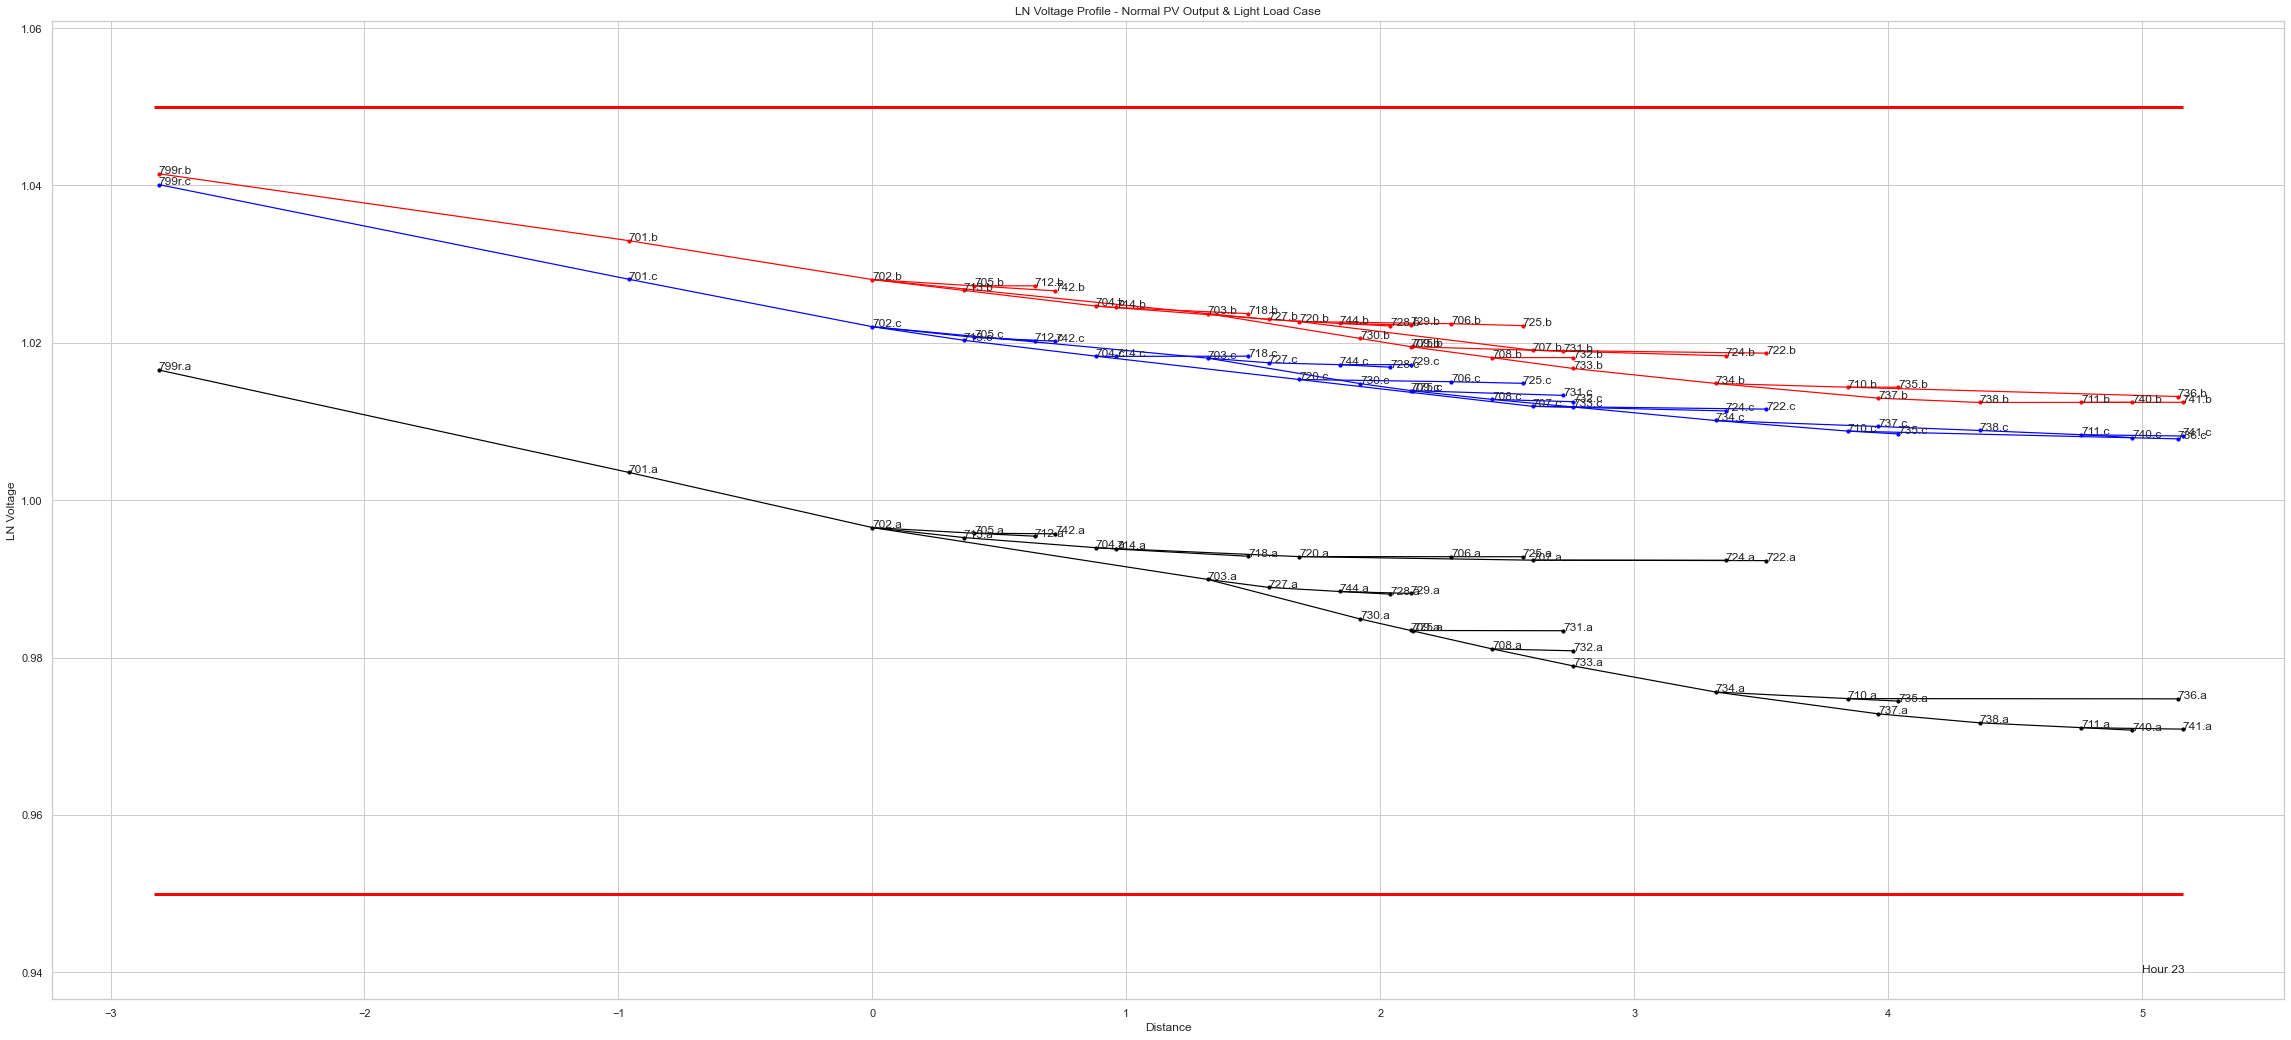

In [24]:
fig = plt.figure(figsize=(40, 18))
camera = Camera(fig)
plt.xlabel('Distance')
plt.ylabel('LN Voltage')
for t in range(24):
    plt.title("LN Voltage Profile - Normal PV Output & Light Load Case")
    x = dist[2:]
    y1 = newvol[t, 2:, 0]
    y2 = newvol[t, 2:, 1]
    y3 = newvol[t, 2:, 2]
    plt.scatter(x, y1, c='black', s=10)
    plt.scatter(x, y2, c='red', s=10)
    plt.scatter(x, y3, c='blue', s=10)
    plt.hlines(0.95, dist[0], max(dist), colors='red', linewidth=3)
    plt.hlines(1.05, dist[0], max(dist), colors='red', linewidth=3)
    plt.text(5, 0.94, "Hour "+str(t))
    for i in range(2, len(newpos)): 
        name = busposition.iloc[i,0]
        x = dist[i] 
        ya = newvol[t,i,0]
        yb = newvol[t,i,1]
        yc = newvol[t,i,2]
        plt.text(x, ya, name+".a")
        plt.text(x, yb, name+".b")
        plt.text(x, yc, name+".c")

    for i in range(len(B1)):
        ind1 = np.where(busposition.iloc[:,0]==B1[i])[0][0]
        ind2 = np.where(busposition.iloc[:,0]==B2[i])[0][0]
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,0], newvol[t,ind2,0]], c='black', linewidth=1.2)
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,1], newvol[t,ind2,1]], c='red', linewidth=1.2)
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,2], newvol[t,ind2,2]], c='blue', linewidth=1.2)
    camera.snap()
anim = camera.animate(interval=1000, blit=True)
HTML(anim.to_html5_video())

In [25]:
anim.save('QpriorVV Normal PV Output Light Load Case.mp4')

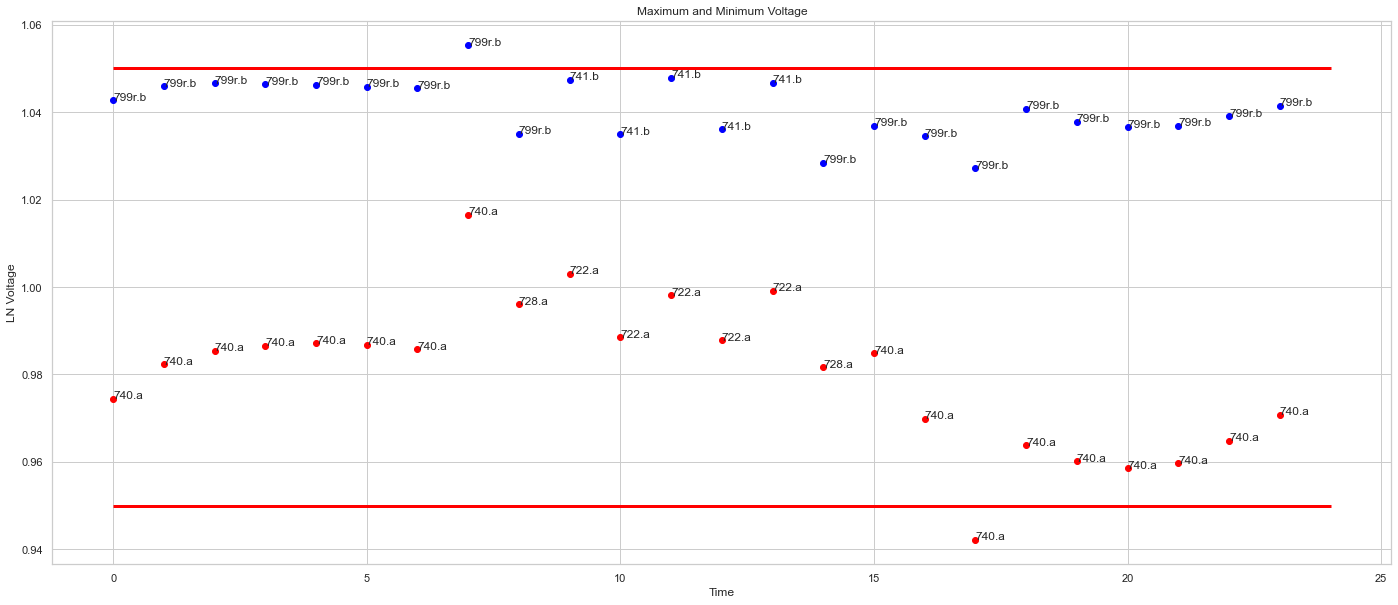

In [26]:
fig = plt.figure(figsize=(24, 10))
plt.xlabel('Time')
plt.ylabel('LN Voltage')
plt.title('Maximum and Minimum Voltage')
for t in range(24):
    plt.scatter(t, np.max(newvol[t,2:,:]), c='blue')    
    plt.scatter(t, np.min(newvol[t,2:,:]), c='red')
    maxind = np.argmax(newvol[t,2:,:])
    minind = np.argmin(newvol[t,2:,:])
    #print(maxind, minind)
    if (maxind)%3 == 0:
        phsmax = 'a'
    elif (maxind)%3 == 1:
        phsmax = 'b'
    else:
        phsmax = 'c'
        
    if (minind)%3 == 0:
        phsmin = 'a'
    elif (minind)%3 == 1:
        phsmin = 'b'
    else:
        phsmin = 'c'
        
    plt.text(t, np.max(newvol[t,2:,:]), busposition.iloc[(maxind)//3+2,0] + "."+ phsmax)
    plt.text(t, np.min(newvol[t,2:,:]), busposition.iloc[(minind)//3+2,0] + "."+ phsmin)
    #print(maxind, minind, maxind//38, minind//38)
plt.hlines(0.95, 0, 24, colors='red', linewidth=3)
plt.hlines(1.05, 0, 24, colors='red', linewidth=3)

In [27]:
ind_pv = np.zeros(len(pv_location), dtype=int)
for i in range(len(pv_location)):
    ind_pv[i] = int(np.where(busnamepos[:,0]==pv_location[i])[0][0])

Vavg = np.mean(V_list.reshape(24,-1,3), axis=2)
PV_Volts = Vavg[:,ind_pv]
PV_PQ = np.array(PV_list)
PV_outputs = np.concatenate([PV_Volts.reshape(24,-1,1), PV_PQ[:,:,:2]], axis=2)
PV_outputs.shape

(24, 5, 3)

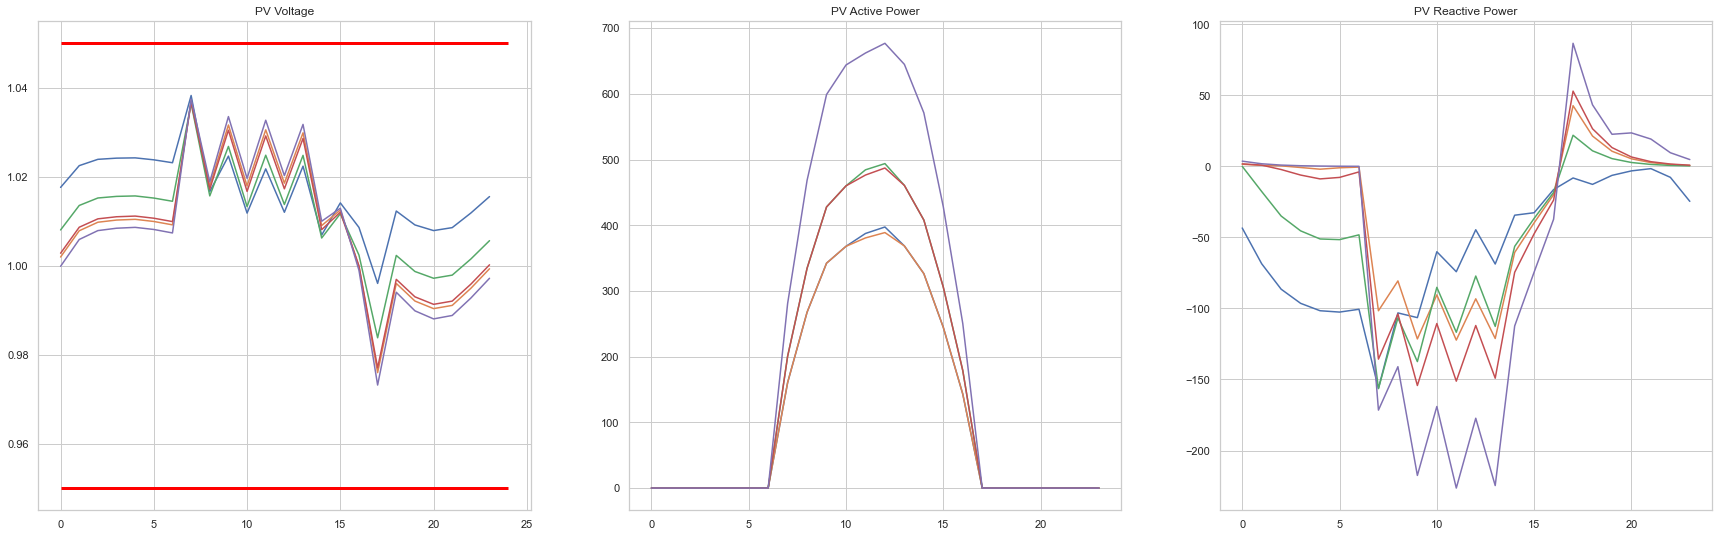

In [28]:
#plt.title("Voltage and Power Output of PVs")
#for t in range(2):
plt.figure(figsize=(30,9))
plt.subplot(131)
for i in range(5):
    plt.plot(PV_outputs[:,i,0])
plt.hlines(0.95, 0, 24, colors='red', linewidth=3)
plt.hlines(1.05, 0, 24, colors='red', linewidth=3)
plt.title("PV Voltage")

plt.subplot(132)
for i in range(5):
    plt.plot(PV_outputs[:,i,1])
plt.title("PV Active Power")

plt.subplot(133)
for i in range(5):
    plt.plot(PV_outputs[:,i,2])
plt.title("PV Reactive Power")
plt.show()

## 4-3. Normal PV Output & Normal Load Case

In [29]:
for loadname in allLoad_name:
    dss.run_command("Load."+loadname+".daily=MyLoad")

In [30]:
V_list, P_list, PV_list = [], [], []
dss.Solution.Hour = 0
for i in range(24):    
    dss.Solution.InitSnap()
    dss.Solution.SolvePlusControl()
    dss.run_command("Export monitors PV5m1")
    dss.run_command("Export monitors PV5m0")
    dss.run_command("Export Powers")
    dss.run_command("Export Voltages")
    dss.Solution.FinishTimeStep()
    dss.Solution.Hour = dss.Solution.Hour+1
    
    volts = dss.Circuit.AllBusMagPu()
    powers = pd.read_csv('ieee37_EXP_POWERS.csv')
    PVS = dss.utils.pvsystems_to_dataframe()
    
    V_list.append(volts)
    P_list.append(powers.iloc[-5:,2:4])
    PV_list.append(PVS.iloc[:,7:9])
dss.Monitors.SaveAll()    
V_list = np.array(V_list)

In [31]:
V3_list = V_list.reshape(24,-1)
V3p_list = V3_list.reshape(24,-1,3)
V3p_list = V3p_list[:,:,:]
posvalue = busnamepos[:,1:].astype(np.float)

ind = np.zeros(len(posvalue))
dist = np.zeros(len(posvalue))
#dist_d = np.zeros(len(posvalue))
newvol = np.zeros(V3p_list.shape)
for i in range(len(posvalue)):
    ind[i] = np.where(BusVol[:,0]==busposition.iloc[i, 0])[0][0]
    ind = ind.astype(np.int)
    newvol[:,i,:] = V3p_list[:,ind[i],:]
    if i<4:
        dist[i] = busposition.iloc[4, 2] - busposition.iloc[i, 2] 
    else:
        dist[i] = abs(busposition.iloc[i, 1]) + abs(busposition.iloc[4, 2]-busposition.iloc[i, 2])
dist[31] = dist[12]+1.3
dist[19] = dist[9] +0.92
dist[33] = dist[32]+0.4
dist[13] = dist[33]+0.4
dist[34] = dist[13]+0.2
dist[35] = dist[13]+0.4

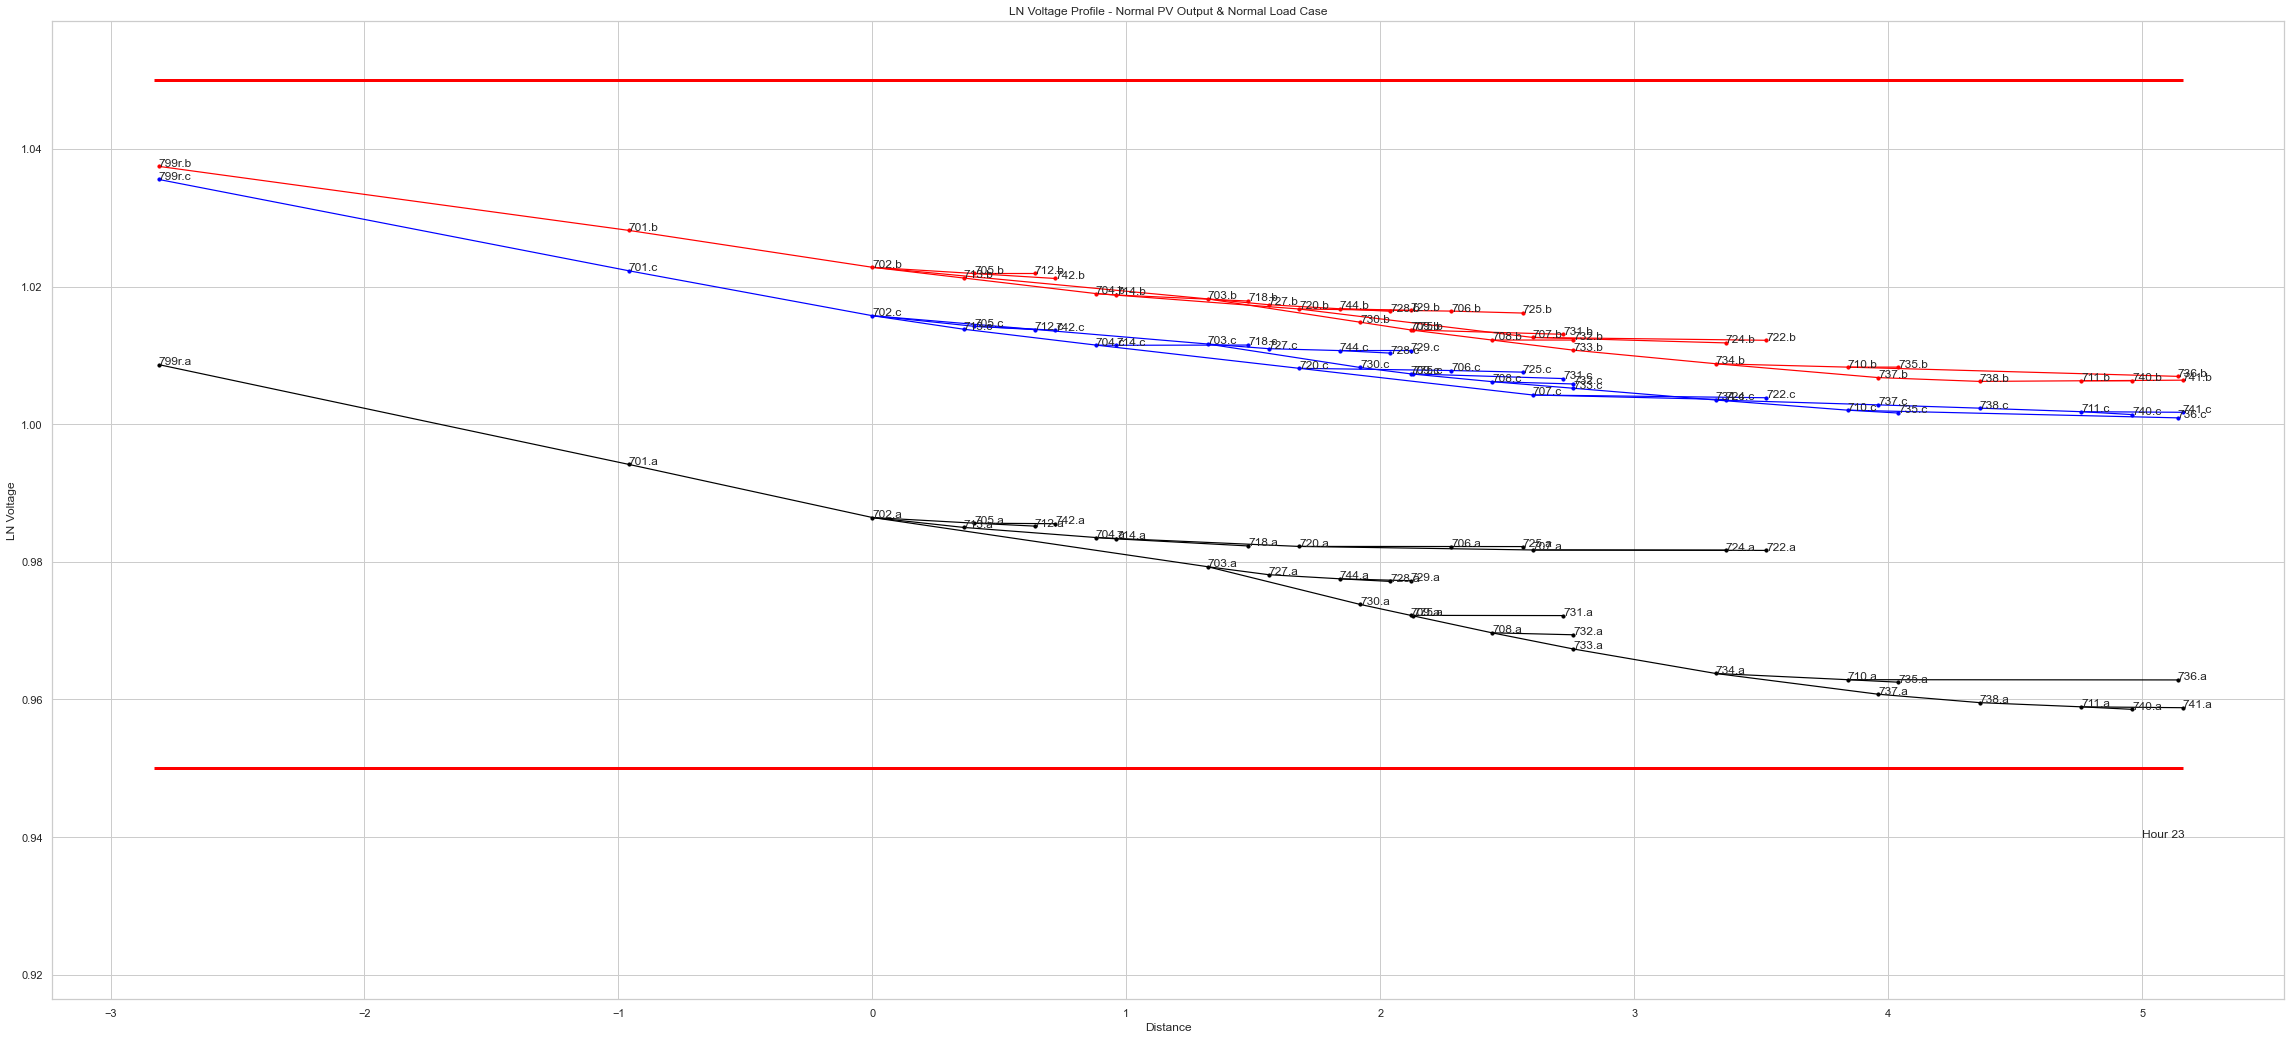

In [32]:
fig = plt.figure(figsize=(40, 18))
camera = Camera(fig)
plt.xlabel('Distance')
plt.ylabel('LN Voltage')
for t in range(24):
    plt.title("LN Voltage Profile - Normal PV Output & Normal Load Case")
    x = dist[2:]
    y1 = newvol[t, 2:, 0]
    y2 = newvol[t, 2:, 1]
    y3 = newvol[t, 2:, 2]
    plt.scatter(x, y1, c='black', s=10)
    plt.scatter(x, y2, c='red', s=10)
    plt.scatter(x, y3, c='blue', s=10)
    plt.hlines(0.95, dist[0], max(dist), colors='red', linewidth=3)
    plt.hlines(1.05, dist[0], max(dist), colors='red', linewidth=3)
    plt.text(5, 0.94, "Hour "+str(t))
    for i in range(2, len(newpos)): 
        name = busposition.iloc[i,0]
        x = dist[i] 
        ya = newvol[t,i,0]
        yb = newvol[t,i,1]
        yc = newvol[t,i,2]
        plt.text(x, ya, name+".a")
        plt.text(x, yb, name+".b")
        plt.text(x, yc, name+".c")

    for i in range(len(B1)):
        ind1 = np.where(busposition.iloc[:,0]==B1[i])[0][0]
        ind2 = np.where(busposition.iloc[:,0]==B2[i])[0][0]
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,0], newvol[t,ind2,0]], c='black', linewidth=1.2)
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,1], newvol[t,ind2,1]], c='red', linewidth=1.2)
        plt.plot([dist[ind1], dist[ind2]], [newvol[t,ind1,2], newvol[t,ind2,2]], c='blue', linewidth=1.2)
    camera.snap()
anim = camera.animate(interval=1000, blit=True)
HTML(anim.to_html5_video())

In [33]:
anim.save('QpriorVV Normal PV Output Normal Load Case.mp4')

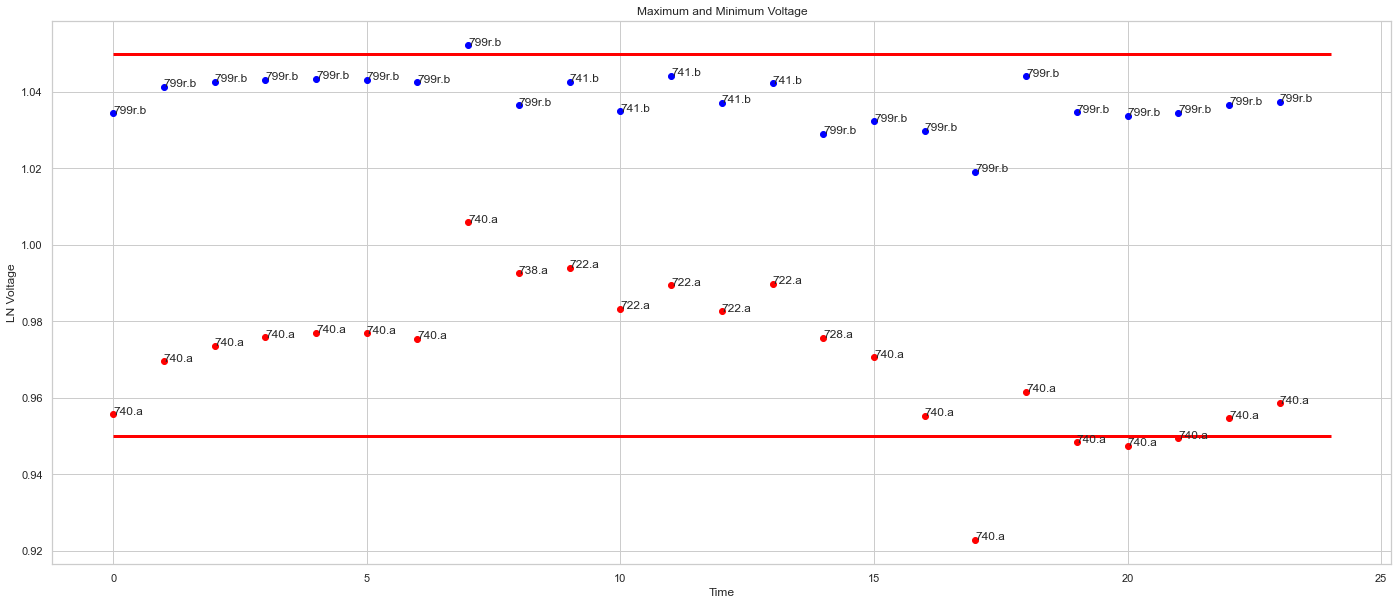

In [34]:
fig = plt.figure(figsize=(24, 10))
plt.xlabel('Time')
plt.ylabel('LN Voltage')
plt.title('Maximum and Minimum Voltage')
for t in range(24):
    plt.scatter(t, np.max(newvol[t,2:,:]), c='blue')    
    plt.scatter(t, np.min(newvol[t,2:,:]), c='red')
    maxind = np.argmax(newvol[t,2:,:])
    minind = np.argmin(newvol[t,2:,:])
    #print(maxind, minind)
    if (maxind)%3 == 0:
        phsmax = 'a'
    elif (maxind)%3 == 1:
        phsmax = 'b'
    else:
        phsmax = 'c'
        
    if (minind)%3 == 0:
        phsmin = 'a'
    elif (minind)%3 == 1:
        phsmin = 'b'
    else:
        phsmin = 'c'
        
    plt.text(t, np.max(newvol[t,2:,:]), busposition.iloc[(maxind)//3+2,0] + "."+ phsmax)
    plt.text(t, np.min(newvol[t,2:,:]), busposition.iloc[(minind)//3+2,0] + "."+ phsmin)
    #print(maxind, minind, maxind//38, minind//38)
plt.hlines(0.95, 0, 24, colors='red', linewidth=3)
plt.hlines(1.05, 0, 24, colors='red', linewidth=3)

In [35]:
ind_pv = np.zeros(len(pv_location), dtype=int)
for i in range(len(pv_location)):
    ind_pv[i] = int(np.where(busnamepos[:,0]==pv_location[i])[0][0])

Vavg = np.mean(V_list.reshape(24,-1,3), axis=2)
PV_Volts = Vavg[:,ind_pv]
PV_PQ = np.array(PV_list)
PV_outputs = np.concatenate([PV_Volts.reshape(24,-1,1), PV_PQ[:,:,:2]], axis=2)
PV_outputs.shape

(24, 5, 3)

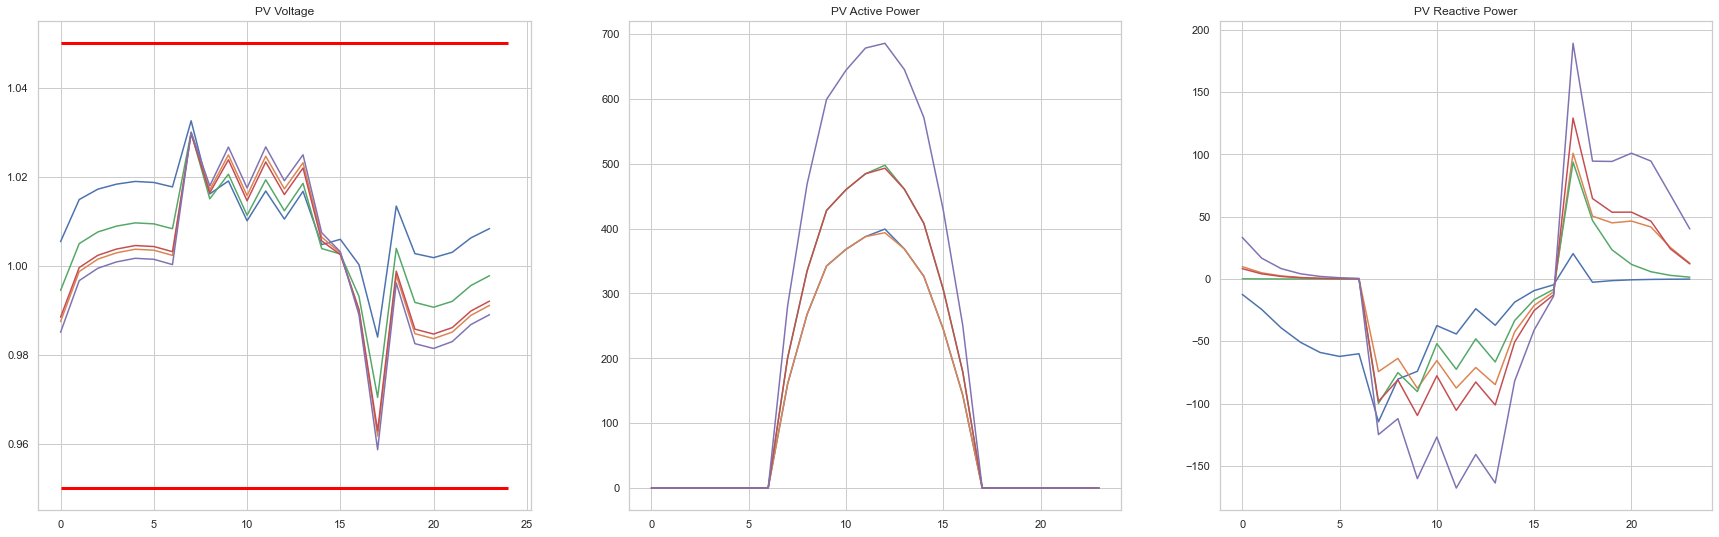

In [36]:
#plt.title("Voltage and Power Output of PVs")
#for t in range(2):
plt.figure(figsize=(30,9))
plt.subplot(131)
for i in range(5):
    plt.plot(PV_outputs[:,i,0])
plt.hlines(0.95, 0, 24, colors='red', linewidth=3)
plt.hlines(1.05, 0, 24, colors='red', linewidth=3)
plt.title("PV Voltage")

plt.subplot(132)
for i in range(5):
    plt.plot(PV_outputs[:,i,1])
plt.title("PV Active Power")

plt.subplot(133)
for i in range(5):
    plt.plot(PV_outputs[:,i,2])
plt.title("PV Reactive Power")
plt.show()
